https://fdasrsf-python.readthedocs.io/en/latest/time_warping.html

In [67]:
from skfda.preprocessing.registration import landmark_registration, landmark_registration_warping
from skfda.representation.grid import FDataGrid

In [111]:
from fdasrsf.time_warping import align_fPCA

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import interp1d

import time
tstamp = time.strftime("%d_%m_%Y_%H_%M", time.localtime())

for att in ['axes.labelsize', 'axes.titlesize', 'legend.fontsize',
            'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[att] = 13

84
46
8
4


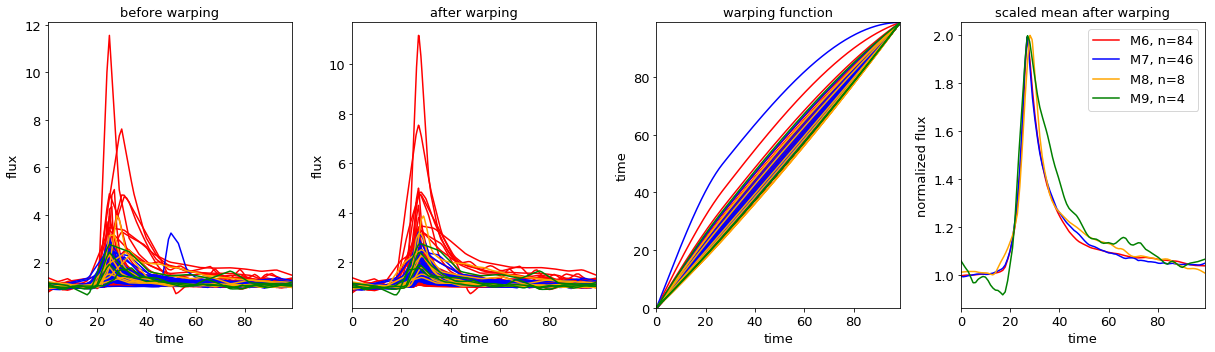

In [138]:

df = pd.read_csv("../flare_tables/20200227_vetted_flares_lacking_some.csv")
df = df[df.real == 1] 
df = df[df.complex == 0]
df = df[df.ampl_rec > .05]
#df = df[df.ampl_rec .< 1., :]
df = df[(df.cstop-df.cstart) < 60]
df = df[(df.cstop-df.cstart) > 2]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5))
    

for cond, S, color in [((df.st == 6), "M6", "red"),
                       ((df.st == 7), "M7", "blue"),
                       ((df.st == 8), "M8", "orange"),
                       ((df.st == 9), "M9", "green"),
                    #  ((df.st > 6), ">M6", "grey"),
                      # ((df.st>5),"all", "k")
                      ]:
    d = df[cond]
    n = d.shape[0]
    print(n)
    a = np.ones((n, 100));
    

    for i in range(n):
        l = d[["TIC","sector","cstart"]].iloc[i]
        s =f"{str(l.TIC).zfill(16)}_{l.sector}_{l.cstart}_rel.csv"
        f = pd.read_csv(f"../flare_snippets/{s}")
        flux = interp1d(f.c, f.f, kind='linear')
        xnew = np.linspace(f.c.values[0],f.c.values[-1],100)
        y2 = (flux(xnew) -1.) * 100 / f.shape[0] + 1.
        a[i,:] =  y2
        axes[0].plot(y2, c=color)
    axes[0].set_xlabel("time")
    axes[0].set_ylabel("flux")
    axes[0].set_title("before warping")



    landmarks = np.array([np.argmax(j) for j in a])

    dat = FDataGrid(a, axes_labels=["time", "flux"], sample_points=np.arange(100))

    lmreg = landmark_registration(dat, landmarks)
    lmregwarp = landmark_registration_warping(dat, landmarks)

    lmreg.plot(axes[1],c=color)
    axes[1].set_title("after warping")
    lmregwarp.plot(axes[2], c=color)
    axes[2].set_title("warping function")
    axes[2].set_xlabel("time")
    axes[2].set_ylabel("time")
    axes[2].set_ylim(0,99)
    ma = lmreg.mean().data_matrix[0].T[0].max()-1.
    ((lmreg.mean()-1.)/ma +1.).plot(axes[3],label=f"{S}, n={n}", c=color)
    axes[3].set_ylabel("normalized flux")
    axes[3].set_title("scaled mean after warping")
plt.legend()
plt.tight_layout()
for ax in axes:
    ax.set_xlim(0,99)
plt.savefig(f"../plots/{tstamp}_landmark_registration_linear.png", dpi=300)

pre-flare dip giampapa 1982
filament blocking the flare optically

CME piston stop, 

In [ ]:
align_fPCA(a.T, np.arange(0,100).astype(float))
a.T.shape, np.arange(0,100).shape